Initial Scratch Work Code

In [37]:
import spacy
import networkx as nx


en_nlp = spacy.load('en_core_web_sm')

doc = en_nlp("the hospital admitted the patient with cancer because she required intensive care")

edges = []
for tok in doc:
    edges.extend([(tok.i, child.i) for child in tok.children])


g = nx.Graph()
g.add_edges_from(edges)

distance_matrix = nx.floyd_warshall_numpy(g)
idx_labels = [str(tok) for toc in doc]

In [ ]:
from nltk import Tree

en_nlp = spacy.load('en_core_web_sm')

doc = en_nlp("The quick brown fox jumps over the lazy dog.")

def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_


[to_nltk_tree(sent.root).pretty_print() for sent in doc.sents]

Parser for SD Data Type - deprecated due to problems with repeated words

In [38]:
import pandas as pd
from itertools import groupby
import networkx as nx


data_file = open("/Users/aakritilakshmanan/Downloads/testing.txt", "r", encoding="utf-8")
data = data_file.read().splitlines()
data = [ a[1:] if "_" in a else a for a in data]

for idx, val in enumerate(data):
    if "(" in val:
        data[idx] = (str(val[val.find("(")+1:val.find(",")]), str(val[val.find(",")+2:-1]))


i = (list(g) for _, g in groupby(data, key=''.__ne__))
print(i)
split_file = [a + b for a, b in zip(i, i)]

split = [list(g) for m, g in groupby(data, key=lambda x: x != "") if m]


<generator object <genexpr> at 0x7fefdbf4ef50>


In [ ]:
distance_matrix = []
dicts = []

for val in split:
    print(val)
    G=nx.Graph()
    nodes = val[0].split(" ")
    nodes = [a if not (s:=sum(j == a for j in nodes[:i])) else f'{a}-{s+1}'
    for i, a in enumerate(nodes)]
    print(nodes)
    G.add_nodes_from(nodes)
    G.add_edges_from(val[1:])
    print(G.nodes())
    nx.draw(G)
    distance_matrix.append(nx.floyd_warshall_numpy(G))

In [ ]:
from numpy import inf

for matrix in distance_matrix:
    matrix[matrix == inf] = 2*len(matrix)

Convert Distance Matrices to Pickle File for use in Training

In [ ]:
import pickle
with open('/Users/aakritilakshmanan/Downloads/distance_hospital.pkl', 'wb') as f:
    pickle.dump(distance_matrix, f)

Working with Dataset 2

In [61]:
import regex as re
data_file = open("/Users/aakritilakshmanan/Downloads/paper_sentences.txt", "r", encoding="utf-8")
data = data_file.read().splitlines()
data = [line for line in data if line != ""]

clean_Sentences = []
for ex in data:
    start = ex[:ex.find("(")]
    end = ex[ex.rfind(")")+1:]
    possible = re.findall("([a-zA-Z]+(?![^(]*\)))", ex[ex.find("("):ex.rfind(")")+1])

    clean_Sentences.append(start + possible[0] + end)
    clean_Sentences.append(start + possible[1] + end)

Automatically Create Parse Trees using Spacy

In [ ]:
import spacy
import networkx as nx


en_nlp = spacy.load('en_core_web_sm')
distance_matrices = []
prev = 0
for idx, sent in enumerate(data):
    doc = en_nlp(sent)

    edges = []
    for tok in doc:
        edges.extend([(tok.i, child.i) for child in tok.children])

    g = nx.Graph()
    g.add_edges_from(edges)
    spacy.displacy.render(doc, style="dep")

    distance_matrix = nx.floyd_warshall_numpy(g)
    idx_labels = [str(toc) for toc in doc]
    distance_matrices.append(distance_matrix)

In [39]:
doc = en_nlp("the authors next to the security guard smile after the event ended")

spacy.displacy.render(doc,options = { "distance" : 70})

In [38]:
doc = en_nlp("the author next to the security guards smiles after the event ended")

spacy.displacy.render(doc,options = { "distance" : 70})

In [64]:
import spacy
from spacy_conll import init_parser

nlp = init_parser("en",
                  "stanza",
                  parser_opts={"use_gpu": True, "verbose": False},
                  include_headers=True)


# Parse a string

f = open("/Users/aakritilakshmanan/Downloads/paperactual.txt", "a")
for sent in clean_Sentences:
    doc = nlp(sent)

    # Get CoNLL representation, write to file
    conll = doc._.conll_str
    for line in conll:
        f.write(line)

    f.write("\n")

f.close()

#upload this to ud-annotrix
#EDIT THE ones that need to be editied
#export file from ud-anotrix
#run the following cell blocks

In [ ]:
#parser for CoNLL -> distance matrix

import pandas as pd

data = pd.read_csv("/Users/aakritilakshmanan/Downloads/paperactual.txt.conllu", sep = "\t", header = None)
print(data)
distance_matrix = []
indices = [i for i in range(len(data[0])) if data[0][i] == 1]

for idx, num in enumerate(indices):
    if idx == len(indices)-1:
        newdf = data.iloc[num:]
    else:
        newdf = data.iloc[num:indices[idx+1]]

    if idx == 13:
        print(newdf)
    edges = list(zip(newdf[0],[int(val) if val not in ["_","0", 0] else "_" for val in newdf[6]]))
    for tup in edges:
        if "_" in tup:
            edges.remove(tup)

    G=nx.Graph()
    #G.add_nodes_from(list(newdf[0]))
    #print(edges)
    G.add_edges_from(edges)
    print(G.nodes())
    #nx.draw(G)
    distance_matrix.append(nx.floyd_warshall_numpy(G))
    

In [ ]:
from numpy import inf

for matrix in distance_matrix:
    matrix[matrix == inf] = 2*len(matrix)

for i in range(0, len(distance_matrix), 2):
    print(i)
    subtract = distance_matrix[i] - distance_matrix[i+1]
    
    for j in range(len(subtract)):
        for k in range(len(subtract[0])):
            if subtract[j][k] > 0:
                distance_matrix[i+1][j][k] += subtract[j][k]*2
    

Code to Create the Heatmaps

In [34]:
import numpy as np

matrix_1 = np.array(matrix_1)
matrix_2 = np.array(matrix_2)
dist = np.array(distance_matrices[1])

sentences = "The man drove the car with a broken [MASK] to the mechanic"
sentences = sentences.split(" ")


/opt/anaconda3/envs/cs224n/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


<Figure size 700x700 with 0 Axes>

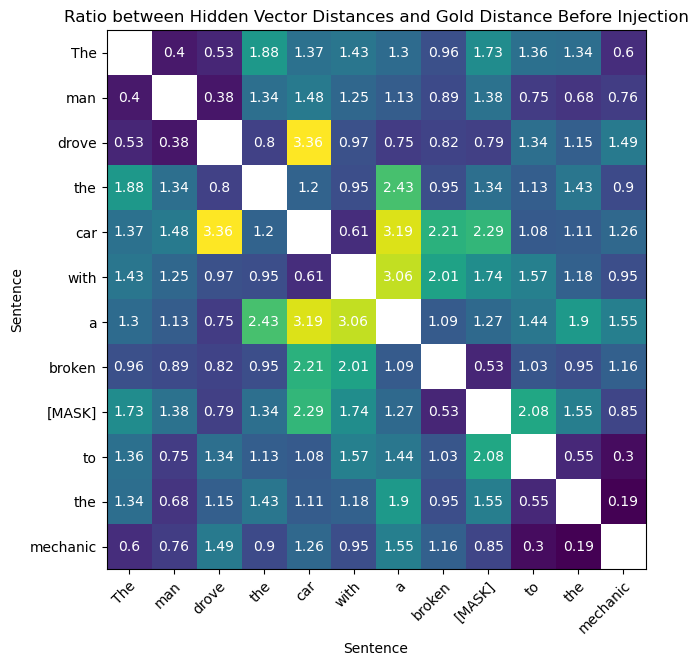

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))

counts = dist/matrix_1
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(counts)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(dist)), labels=sentences)
ax.set_yticks(np.arange(len(dist)), labels=sentences)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(dist)):
    for j in range(len(dist)):
        text = ax.text(j, i, counts[i][j].round(2),
                       ha="center", va="center", color="w")

ax.set_title("Ratio between Hidden Vector Distances and Gold Distance Before Injection")
ax.set_ylabel("Sentence")
ax.set_xlabel("Sentence")
plt.savefig("oneoneone.png")
plt.show()

/opt/anaconda3/envs/cs224n/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


<Figure size 700x700 with 0 Axes>

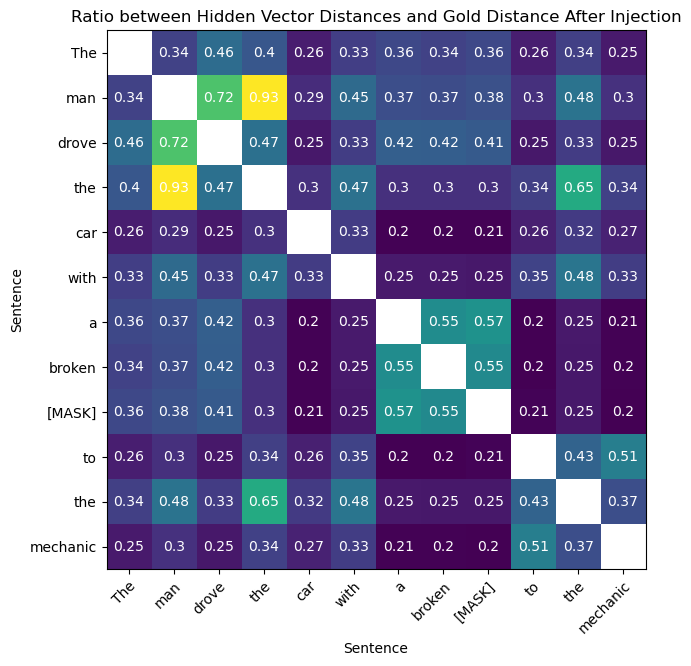

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))

counts = dist/matrix_2
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(counts)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(dist)), labels=sentences)
ax.set_yticks(np.arange(len(dist)), labels=sentences)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(dist)):
    for j in range(len(dist)):
        text = ax.text(j, i, counts[i][j].round(2),
                       ha="center", va="center", color="w")

ax.set_title("Ratio between Hidden Vector Distances and Gold Distance After Injection")
ax.set_ylabel("Sentence")
ax.set_xlabel("Sentence")
plt.savefig("onetwo.png")
plt.show()